# Exploratory Data Analysis of River Water Quality Data

Levi Rose and Dakota Murray

CS-5545-101: Data Programming

## Data Set Description

This data set provides a limited set of raw water quality observation data collected in the Lower New River Watershed of West Virginia. It contains information about the location, date, concentration, and chemical constituents collected. All chemical constituents have been analyzed by a state certified lab in West Virginia. 

## Exploratory Data Analysis

The purpose of this guide is to provide organization and insight for anyone who is approaching exploratory data analysis. Water quality data is analyzed in the guide, but the methods and techniques can accommodate a wide variety of data. The use of exploratory techniques is intended to disclose patterns in sets of data, and also to reveal the shape and nature of the data you are examining (Waltenburg and McLauchlan 2012).  Waltenburg and McLauchlan (2012) emphasize that "graphical presentation of data is very important for both the analysis of the variables and for the presentation of the findings that emerge from the data. As a result, a good deal of exploratory data analysis involves graphing and plotting data, both single variables and multiple-variable data sets." Understanding how different variables are related and where outliers occur can aid in the design of statistical analysis that produce meaningful results (U.S. Environmental Protection Agency). As detailed in the engineering statistics handbook, "the primary goal of exploratory data analysis is to maximize the analyst's insight into a data set , while providing all of the specific items that an analyst would want to extract from a data set, such as" (1) a good-fitting, parsimonious model, (2) a list of outliers, (3) a sense of robustness of conclusions, (4) estimates for parameters, (5) uncertainties for those estimates, (6) a ranked list of important factors, (7) conclusions as to whether individual factors are statistically significant, (8) optimal settings" (NIST/SEMATECH e-Handbook of Statistical Methods http://www.itl.nist.gov/div898/handbook/eda/eda.htm). 

<font size="3">"The greatest value of a picture is when it forces us to notice what we never expected to see." John Tukey, 1977</font>

## Loading Data Files

After you have performed preliminary quality assurance on the data set to be analyzed, it is ready to be loaded. Data files can be called into jupyter in a variety of ways, in this tutorial we are using pandas to read a csv file, <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv()</a>. In the example below, a data file is read into jupyter using the pd.read_csv function and the result is a dataframe named "df". 

In [2]:
# Pandas for data manipulation
import pandas as pd

filename = "Project_Data_v3.csv"

#Read csv file and define dataframe object (df for dataframe)
df = pd.read_csv(filename, header=0, parse_dates=['Sample_Date'], na_values=[""])

The next step is to make sure your data set was uploaded properly. The <a href="http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.head.html">pandas.DataFrame.head</a> returns first n rows, 5 by default.

In [3]:
df.head()

,Site_Grouping,Site_ID,Stream_Name,Sample_Date,Aluminum_total,Arsenic,Barium,Calcium_total,Iron_total,Lithium,...,Selenium,Sodium_total,Strontium,Bromide,Chloride,Sulfate,Acidity_total,Alkalinity_total,Specific_Conductivity,Total_Dissolved_Solids
0,UIC_Downstream,UIC-1,Wolf_Creek,2013-03-21,0.110,NaN,NaN,NaN,43.43,NaN,...,NaN,NaN,NaN,NaN,283.06,NaN,NaN,NaN,NaN,NaN
1,UIC_Downstream,UIC-1,Wolf_Creek,2013-04-03,0.066,2.4,0.681,30.60,71.80,NaN,...,0,117.00,0.884,2.30,301.00,2.60,167.00,50.2,1150,578
2,UIC_Downstream,UIC-1,Wolf_Creek,2014-03-13,0.200,NaN,NaN,13.38,11.50,11.61,...,NaN,54.46,NaN,NaN,4.84,127.58,4.91,NaN,498,314
3,UIC_Downstream,UIC-1,Wolf_Creek,2014-04-10,NaN,NaN,0.670,NaN,17.20,NaN,...,NaN,67.90,NaN,NaN,186.00,NaN,NaN,NaN,NaN,375
4,UIC_Downstream,UIC-1,Wolf_Creek,2015-01-06,0.055,0.0,0.752,18.60,20.50,0.00,...,0,65.00,0.636,1.46,150.00,2.81,74.10,20.2,689,374


For the purposes of this analysis, the Site_ID and Stream_Name are removed by specifying columns in a new dataframe named "df_subset". Data is sorted by Site_Grouping using <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html">pandas.DataFrame.groupby</a>

In [4]:
df_subset = df[["Site_Grouping","Sample_Date","Aluminum_total","Barium","Calcium_total","Iron_total",
                 "Magnesium_total","Manganese_total","Selenium","Sodium_total","Strontium",
                "Bromide","Chloride","Sulfate","Acidity_total","Alkalinity_total","Total_Dissolved_Solids"
                ]]

df_subgroup = df_subset.groupby("Site_Grouping")
df_subgroup.head()

,Site_Grouping,Sample_Date,Aluminum_total,Barium,Calcium_total,Iron_total,Magnesium_total,Manganese_total,Selenium,Sodium_total,Strontium,Bromide,Chloride,Sulfate,Acidity_total,Alkalinity_total,Total_Dissolved_Solids
0,UIC_Downstream,2013-03-21,0.110,NaN,NaN,43.4300,NaN,3.600,NaN,NaN,NaN,NaN,283.06,NaN,NaN,NaN,NaN
1,UIC_Downstream,2013-04-03,0.066,0.681,30.60,71.8000,12.10,3.550,0,117.00,0.884,2.30,301.00,2.60,167.00,50.20,578
2,UIC_Downstream,2014-03-13,0.200,NaN,13.38,11.5000,5.50,1.730,NaN,54.46,NaN,NaN,4.84,127.58,4.91,NaN,314
3,UIC_Downstream,2014-04-10,NaN,0.670,NaN,17.2000,NaN,2.350,NaN,67.90,NaN,NaN,186.00,NaN,NaN,NaN,375
4,UIC_Downstream,2015-01-06,0.055,0.752,18.60,20.5000,6.75,2.270,0,65.00,0.636,1.46,150.00,2.81,74.10,20.20,374
6,UIC_Upstream,2015-08-14,0.022,0.046,19.60,0.0740,11.30,0.015,0,1.84,0.118,0.00,0.60,70.80,2.80,29.80,188
7,UIC_Upstream,2015-09-24,1.470,0.065,13.80,2.4700,8.22,0.334,0,1.95,0.092,0.00,0.65,32.00,3.60,37.70,116
8,AMD_Site,2009-12-11,13.600,NaN,NaN,75.5000,NaN,11.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AMD_Site,2009-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430.00,486.00,2.86,NaN
10,AMD_Site,2011-12-19,24.000,NaN,NaN,130.0000,NaN,13.000,NaN,NaN,NaN,NaN,NaN,1760.00,944.00,2.86,1950


The <a href="http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.describe.html">pandas.DataFrame.describe</a> function generates various summary statistics using the df_subgroup dataframe.

Descriptive statistics help describe or summarize data in a meaningful way. It allows for a simpler interpretation of the data. Two general types of statistics that are used to describe data are measures of central tendency (mean, median, mode, etc.) and measures of spread (range, quartiles, variance, standard deviation, etc.).  

In [5]:
df_describe = df_subgroup.describe()
df_describe

Aluminum_total    Barium  Calcium_total  Iron_total  \
Site_Grouping                                                                
AMD_Site        count       51.000000  3.000000      44.000000   52.000000   
                mean        21.445882  0.020667     199.631591  105.112115   
                std          8.635364  0.010116      53.599753   34.193960   
                min          6.020000  0.009000      39.660000   13.820000   
                25%         15.435000  0.017500     182.975000   85.710000   
                50%         20.800000  0.026000     207.200000  105.300000   
                75%         28.005000  0.026500     235.500000  123.725000   
                max         46.140000  0.027000     292.400000  192.720000   
Reference_Sites count       17.000000  0.000000      17.000000   17.000000   
                mean         0.151059       NaN       9.226471    0.184912   
                std          0.140238       NaN       5.560935    0.205638   
                min          0.030000       NaN       2.240000    0.030000   
                25%          0.080000       NaN       3.900000    0.076500   
                50%          0.100000       NaN      10.700000    0.093100   
                75%          0.170000       NaN      13.100000    0.190000   
                max          0.530000       NaN      19.900000    0.830000   
UIC_Downstream  count        5.000000  4.000000       4.000000    6.000000   
                mean         0.348200  0.865750      22.270000   65.238333   
                std          0.540686  0.331498       7.741292   82.319504   
                min          0.055000  0.670000      13.380000   11.500000   
                25%          0.066000  0.678250      17.295000   18.025000   
                50%          0.110000  0.716500      22.550000   31.965000   
                75%          0.200000  0.904000      27.525000   64.707500   
                max          1.310000  1.360000      30.600000  227.000000   
UIC_Upstream    count        2.000000  2.000000       2.000000    2.000000   
                mean         0.746000  0.055500      16.700000    1.272000   
                std          1.023891  0.013435       4.101219    1.694228   
                min          0.022000  0.046000      13.800000    0.074000   
                25%          0.384000  0.050750      15.250000    0.673000   
                50%          0.746000  0.055500      16.700000    1.272000   
                75%          1.108000  0.060250      18.150000    1.871000   
                max          1.470000  0.065000      19.600000    2.470000   

                       Magnesium_total  Manganese_total   Selenium  \
Site_Grouping                                                        
AMD_Site        count        44.000000        51.000000   2.000000   
                mean         95.982045        11.049804   0.000000   
                std          27.904132         2.766861   0.000000   
                min          17.040000         2.310000   0.000000   
                25%          82.277500        10.080000   0.000000   
                50%          97.785000        11.200000   0.000000   
                75%         115.525000        13.000000   0.000000   
                max         157.100000        15.400000   0.000000   
Reference_Sites count        17.000000        17.000000  10.000000   
                mean          4.104706         0.013818   1.800000   
                std           2.964336         0.009678   1.686548   
                min           1.500000         0.003000   1.000000   
                25%           1.750000         0.007000   1.000000   
                50%           3.540000         0.010000   1.000000   
                75%           5.430000         0.019000   1.000000   
                max          11.400000         0.038000   5.000000   
UIC_Downstream  count         4.000000         6.000000   3.000000   
                mean          8.437500  

## Graphical Techniques

%matplotlib inline is an important piece of code. With this backend, the output of plotting commands is displayed inline within the notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. The <a href="http://matplotlib.org/1.5.0/gallery.html">matplotlib</a> library is imported, allowing use of many publication quality plotting features. Specific <a href="http://matplotlib.org/1.5.0/api/pyplot_summary.html">plotting commands</a>. Chemical constituents are subset in "df_subset1" for histogram output. 
 
The purpose of a histogram is to graphically summarize the distribution of a univariate data set (Chambers, 1983). These features provide stong indications of the proper distributional model for the data (NIST/SEMATECH e-Handbook of Statistical Methods). 

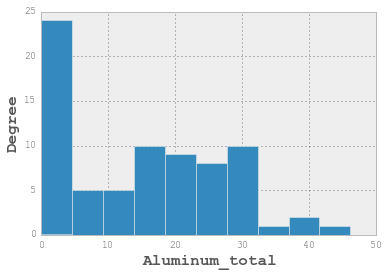

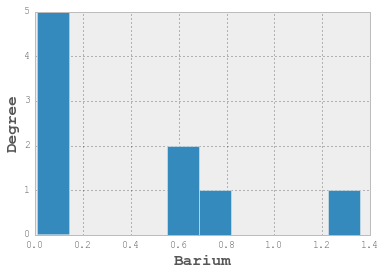

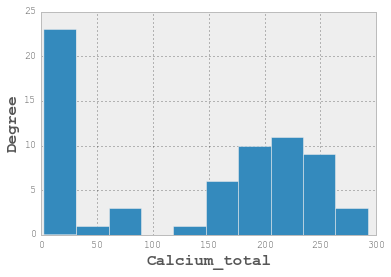

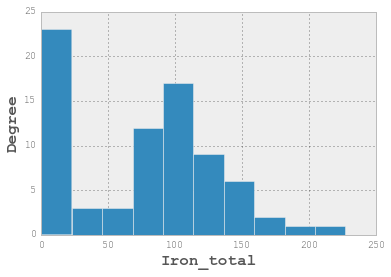

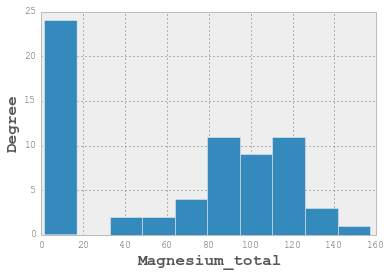

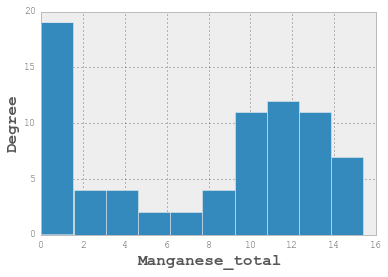

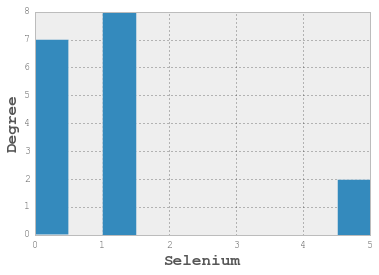

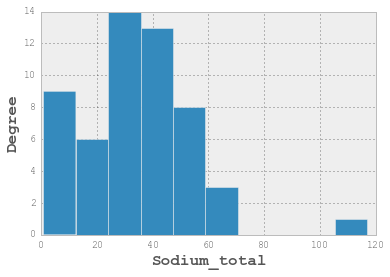

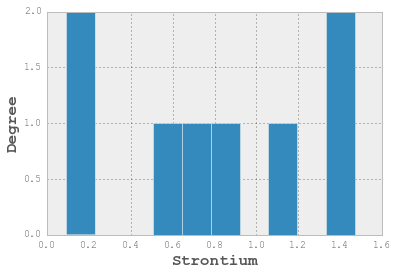

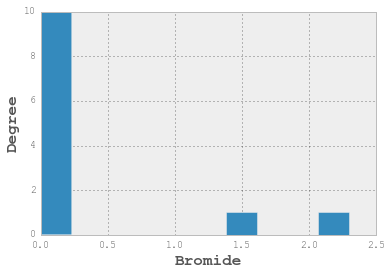

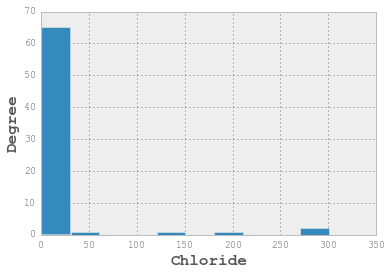

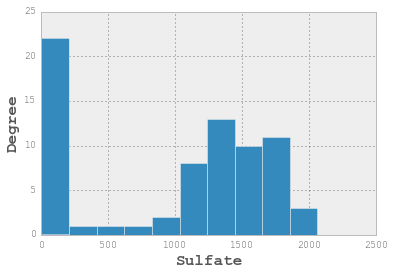

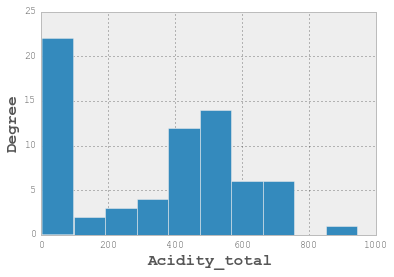

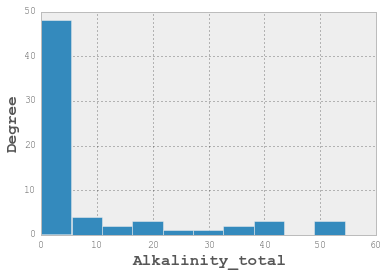

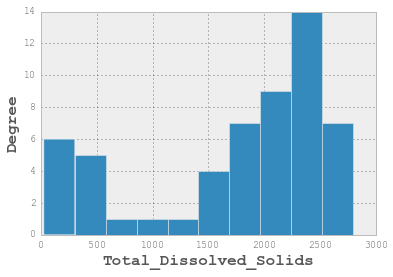

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')

#Get subset of data 
df_subset1 = df[["Aluminum_total","Barium","Calcium_total","Iron_total",
                 "Magnesium_total","Manganese_total","Selenium","Sodium_total","Strontium",
                "Bromide","Chloride","Sulfate",
                 "Acidity_total","Alkalinity_total","Total_Dissolved_Solids"
                ]]

#Loop through subset data and produce historgram for each chemical constituent
for c in df_subset1.columns:
    plt.figure()
    plt.ylabel('Frequency', fontsize=16, weight='bold')
    plt.xlabel(df_subset[c].name, fontsize=16, weight='bold')
    df_subset1[c].plot(kind='hist')
    

The <a href="http://stanford.edu/~mwaskom/software/seaborn/examples/index.html">seaborn</a> library is imported, allowing use of <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html">seaborn.boxplot</a> and <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html">seaborn.stripplot</a>. df and df1 dataframes slightly differ, in that df1 is indexed by "Sample_Date". An index is needed for stripplot functionality.

Box plots are an excellent tool for conveying location and variation information in data sets, particularly for detecting and illustrating location and variation changes between different groups of data (Chambers 1983).

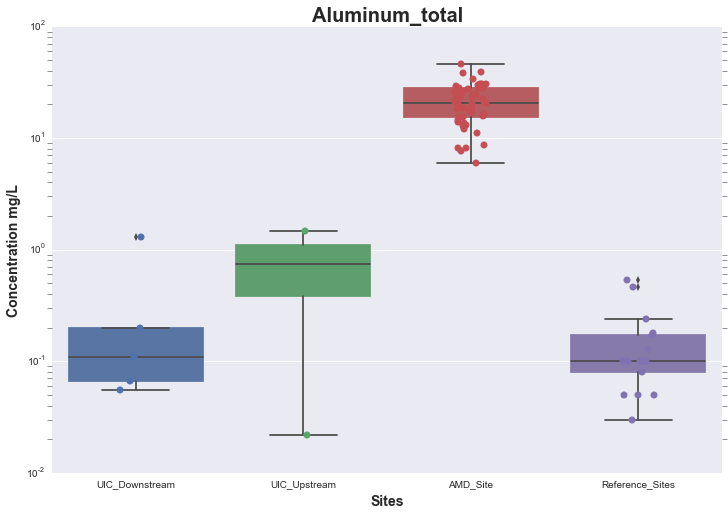

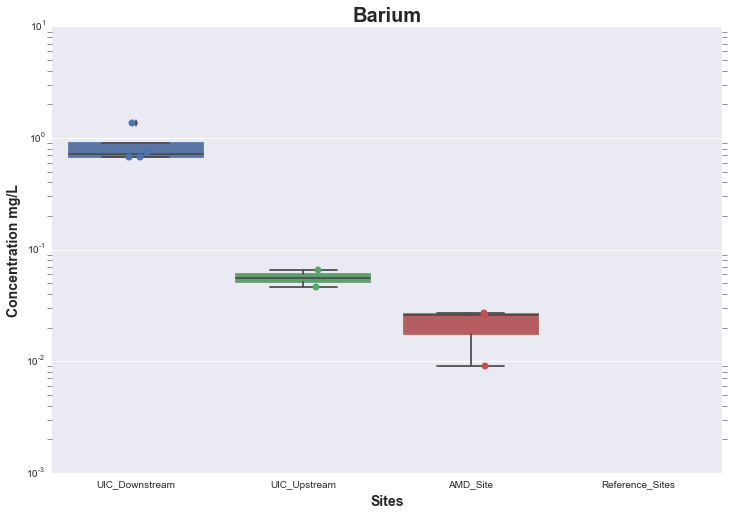

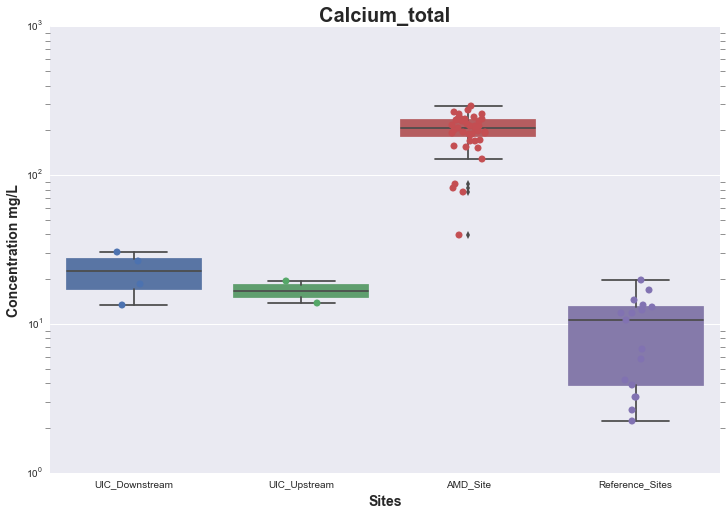

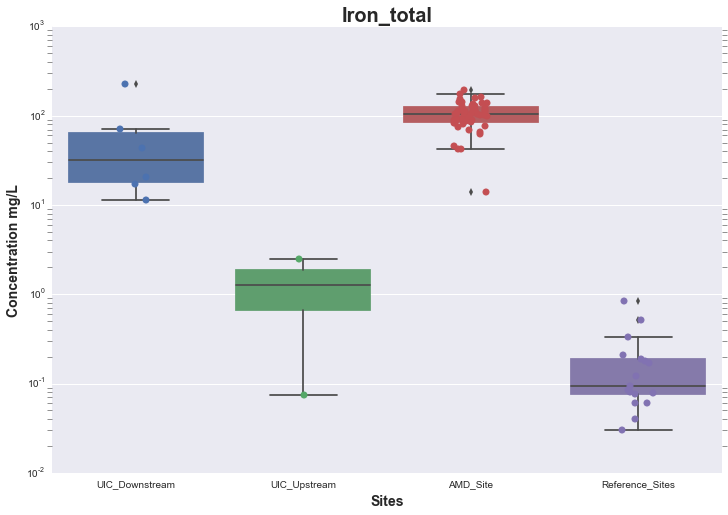

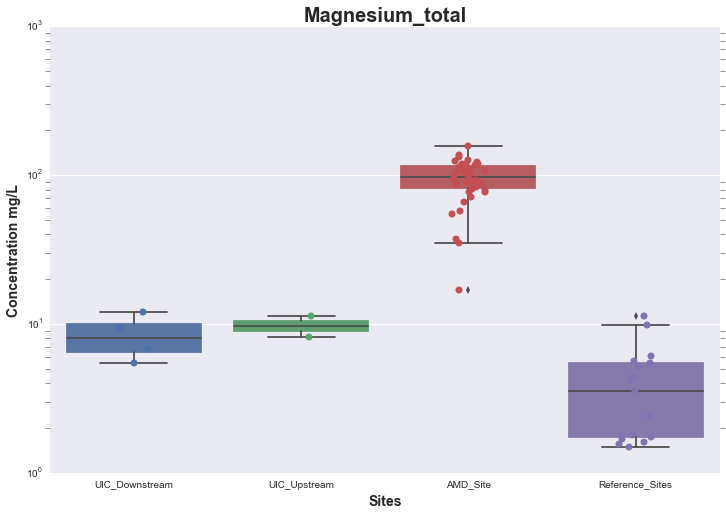

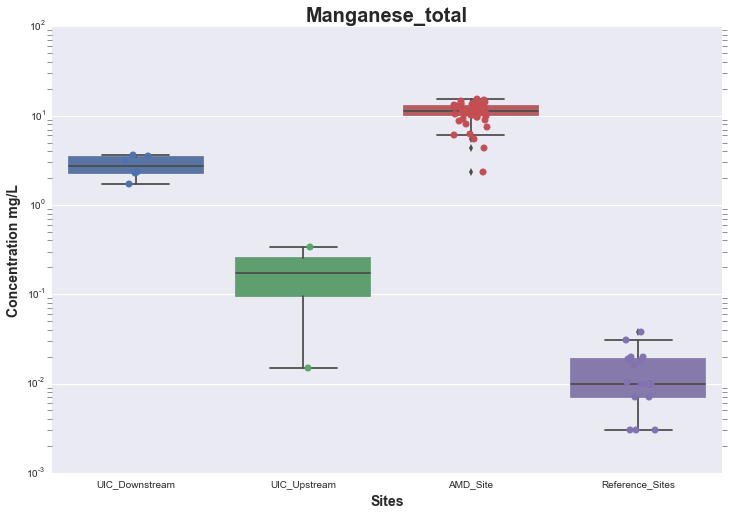

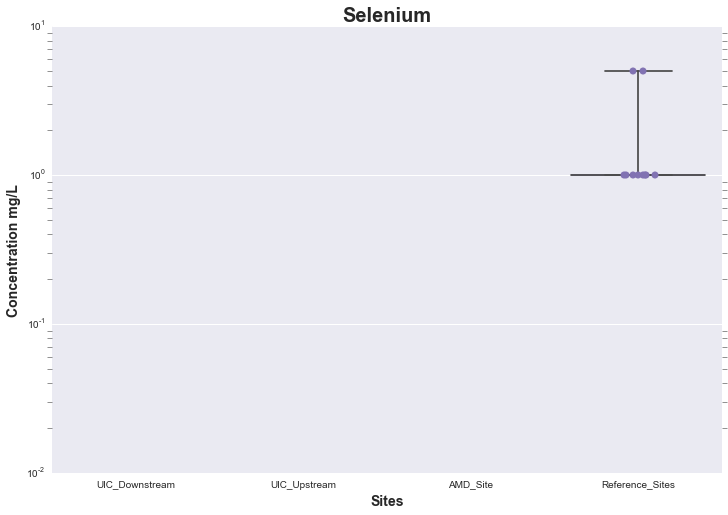

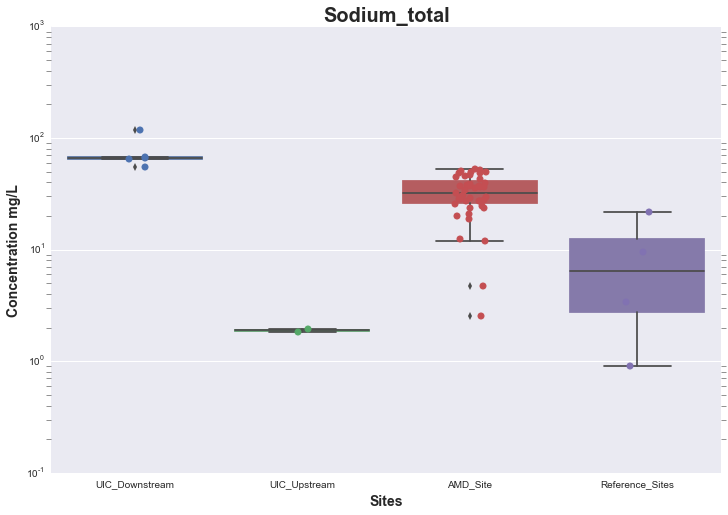

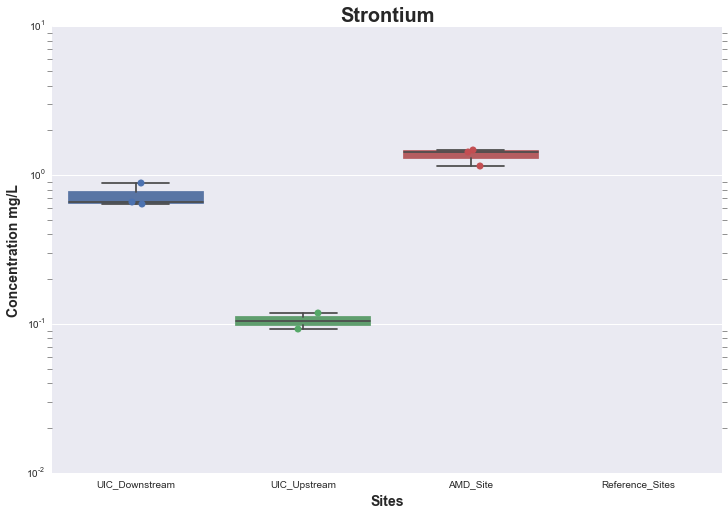

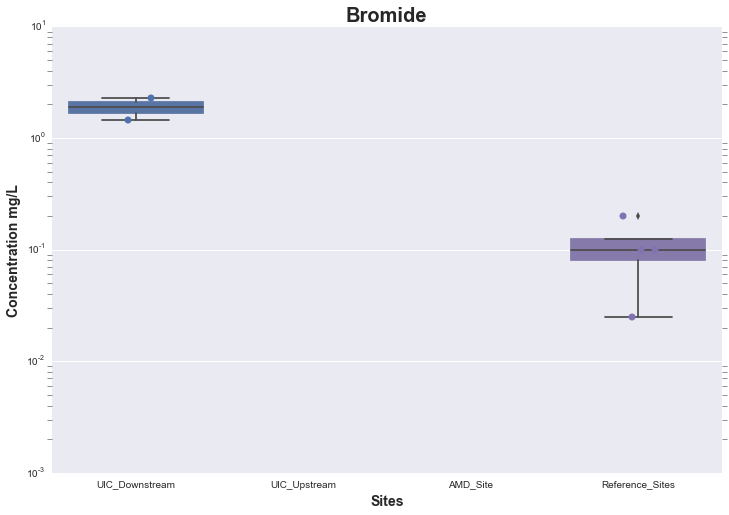

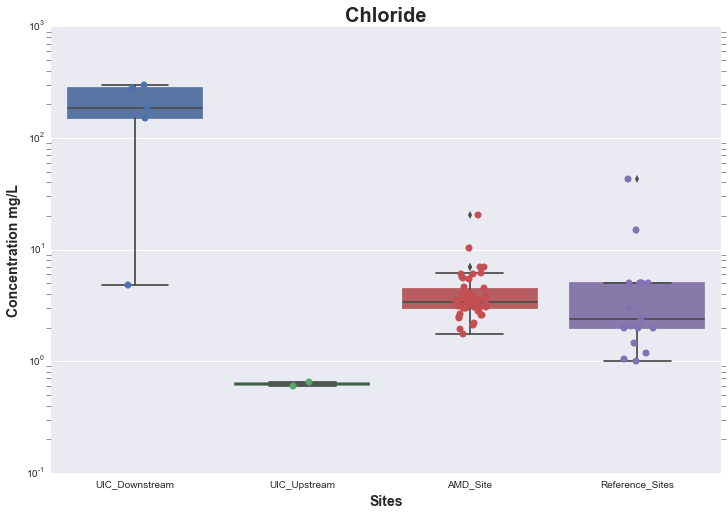

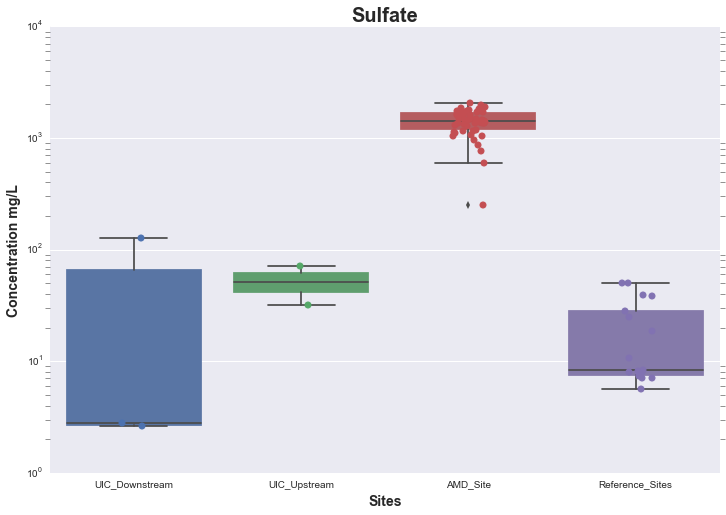

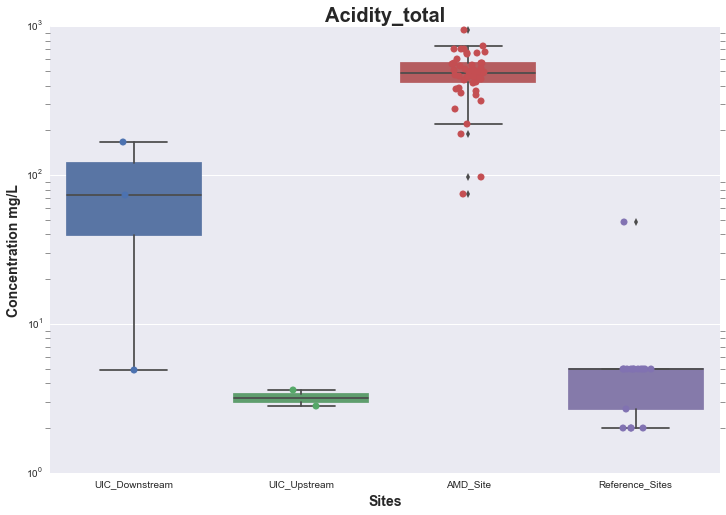

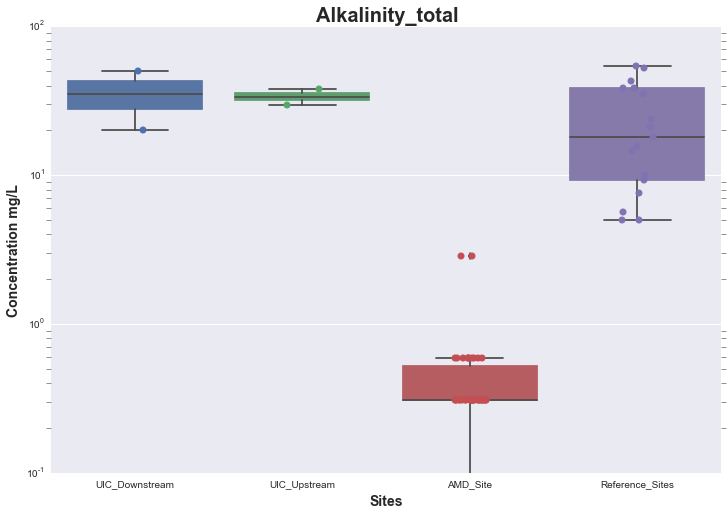

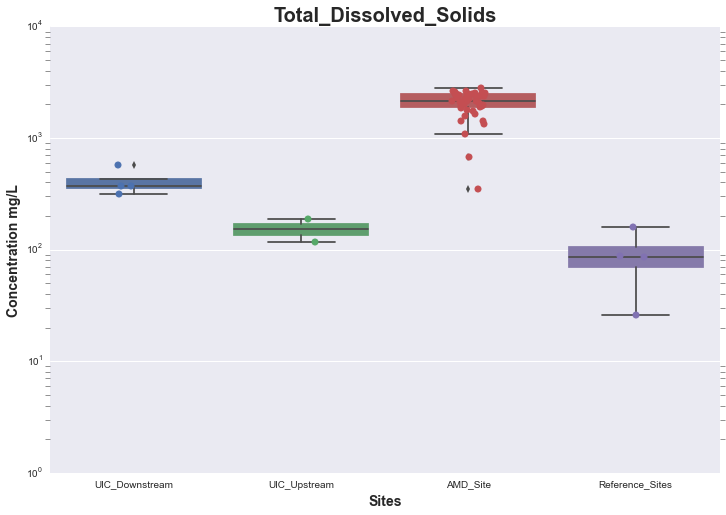

In [7]:
import seaborn as sns
df1 = pd.read_csv(filename, header=0, parse_dates=['Sample_Date'], index_col="Sample_Date", na_values=[""])

#Loop through subset data and produce boxplot for each chemical constituent comparing four sites
for c in df_subset1.columns:
    plt.figure(figsize=(12, 8))
    #sns.set_style("ticks")
    #sns.set_style("darkgrid")
    sns.set_style({"ytick.minor.size":"5"})
    
    sns.boxplot(x="Site_Grouping", y= c, data=df1)
    sns.stripplot(x="Site_Grouping", y= c, data=df1, size=6, edgecolor="gray", jitter=True)
    
    plt.yscale("log")
    plt.xlabel('Sites', fontsize=14, weight='bold')
    plt.ylabel('Concentration mg/L', fontsize=14, weight='bold')
    plt.xticks(fontsize=10)
    plt.title(c , fontsize=20, weight='bold')

In [8]:
#Work in progress. Trying to pull outliers from data set 
#filter chloride from df_describe (grouped by site)
cl = df_describe['Chloride']
#filter AMD_Site
amd_cl = cl['AMD_Site']
#calculate interquartile range from chloride at AMD_Site
iqr = amd_cl['75%'] - amd_cl['25%']
#calculate min outlier value below Q1 
low = amd_cl['25%'] - (iqr*1.5)
#calculate max outlier value above Q3
high = amd_cl['75%'] + (iqr*1.5)
#list of all values at AMD_Site
amd = df[df.Site_Grouping == 'AMD_Site']
#filter all Chloride outliers at AMD_Site 
amd[(amd.Chloride > high)]

,Site_Grouping,Site_ID,Stream_Name,Sample_Date,Aluminum_total,Arsenic,Barium,Calcium_total,Iron_total,Lithium,...,Selenium,Sodium_total,Strontium,Bromide,Chloride,Sulfate,Acidity_total,Alkalinity_total,Specific_Conductivity,Total_Dissolved_Solids
24,AMD_Site,S-1,Wolf_Creek,2010-07-29,17.38,NaN,NaN,215.30,92.29,NaN,...,NaN,38.61,NaN,NaN,6.98,1473.63,462.16,0.31,3670,2097
25,AMD_Site,S-1,Wolf_Creek,2010-08-25,11.18,NaN,NaN,171.20,66.49,NaN,...,NaN,27.50,NaN,NaN,10.36,1191.18,278.57,0.31,1955,1421
26,AMD_Site,S-1,Wolf_Creek,2010-10-01,15.57,NaN,NaN,264.11,116.80,NaN,...,NaN,NaN,NaN,NaN,20.30,1603.40,494.36,0.31,4380,2377
35,AMD_Site,S-1,Wolf_Creek,2012-01-25,24.18,NaN,NaN,169.90,105.30,NaN,...,NaN,27.36,NaN,NaN,7.00,1041.20,571.64,0.31,2210,1768


Matplotlib is used to produce horizontal box plots, grouped by site. 

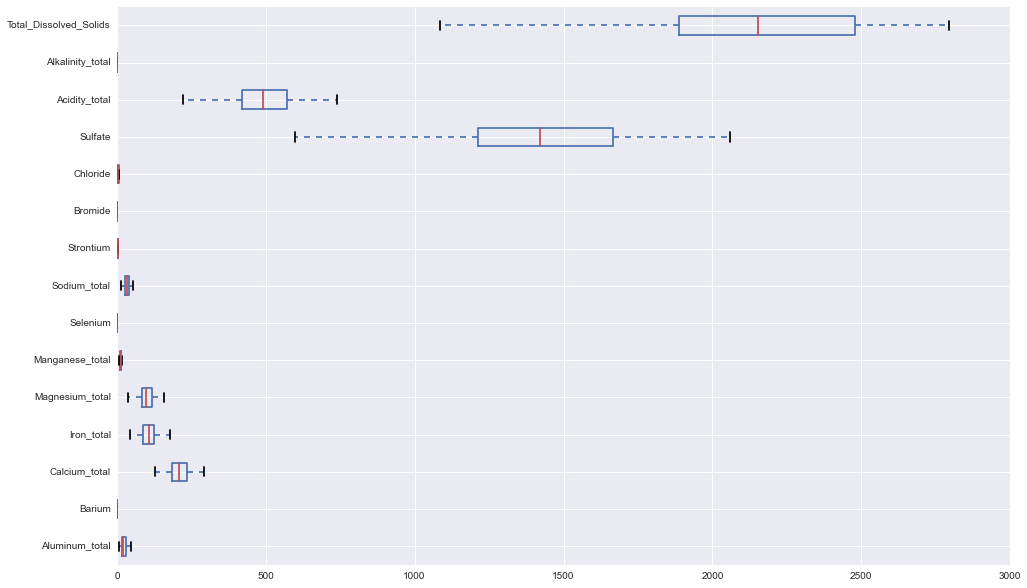

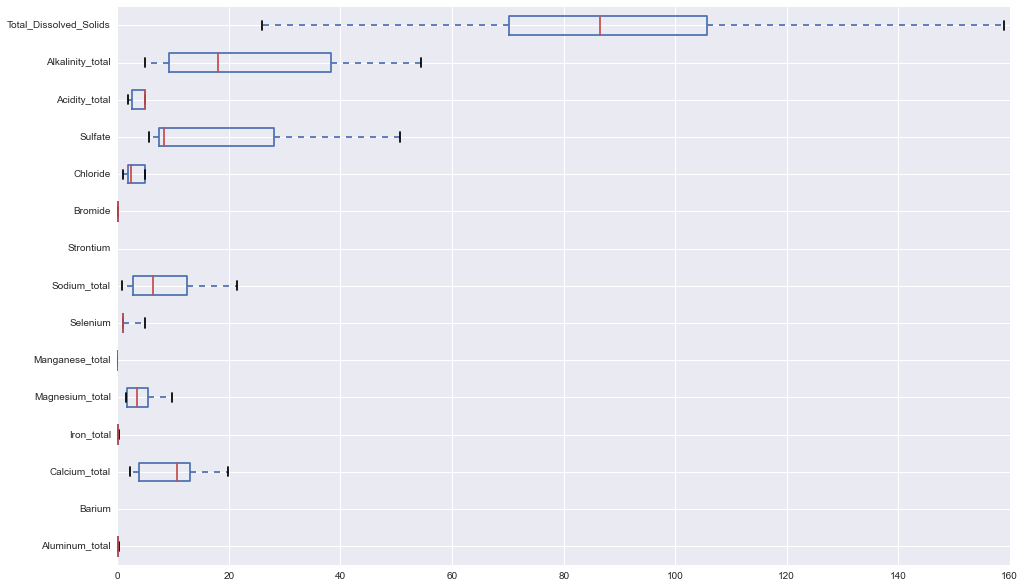

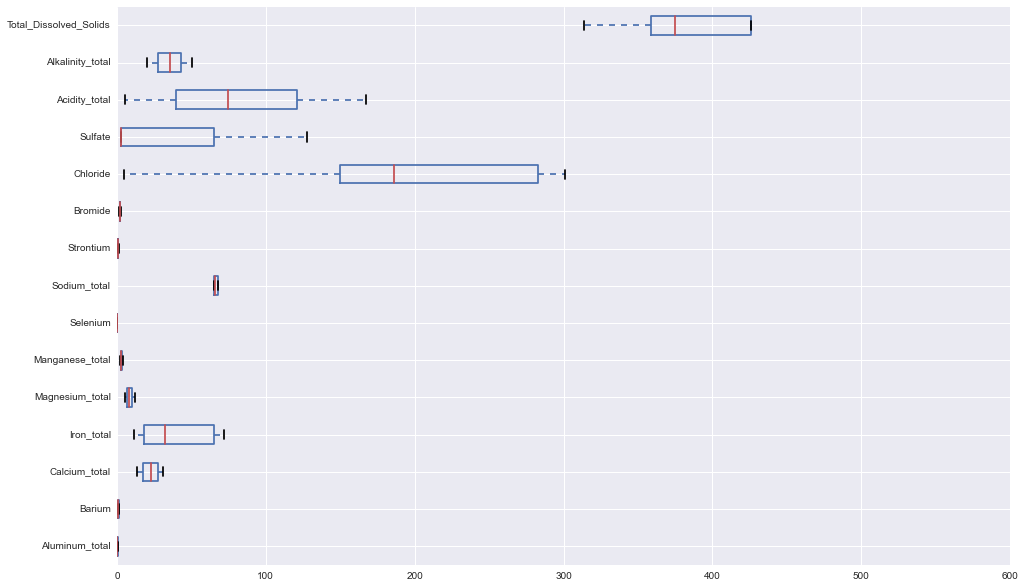

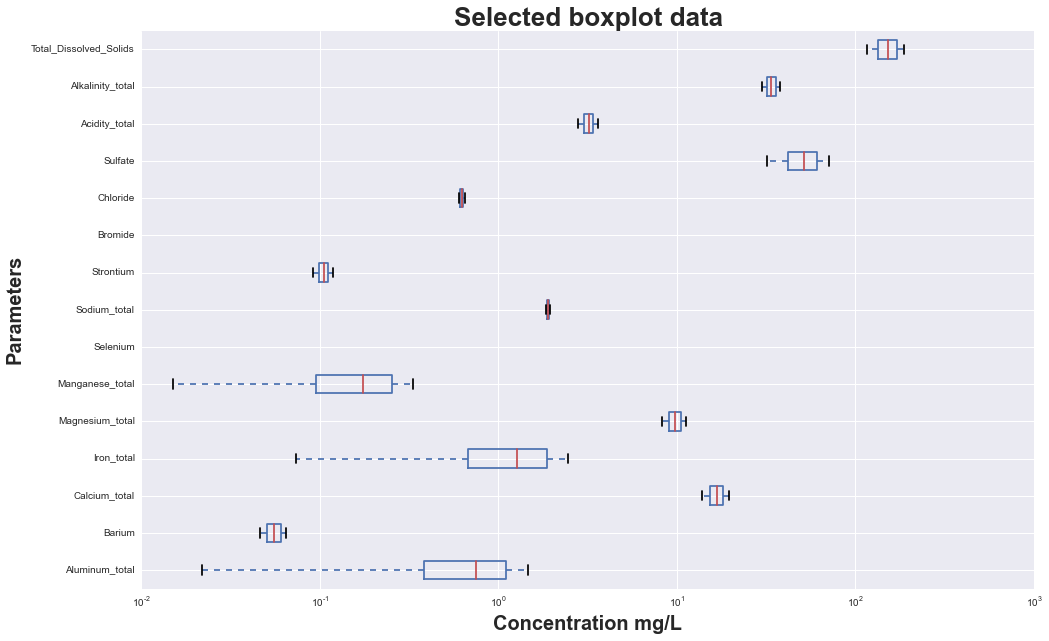

In [9]:
#horizontal box plot
ax = df_subgroup.plot(kind="box", vert=False, figsize=(16, 10))
#log scale
plt.xscale("log")
plt.ylabel('Parameters', fontsize=20, weight='bold')
plt.xlabel('Concentration mg/L', fontsize=20, weight='bold')
#plt.xticks(rotation=90, fontsize=14)
plt.title("Selected boxplot data", fontsize=26, weight='bold')

## Heatmap

One method of exploring the features within a dataset is to create a heatmap. A heatmap is a visualtion of the data that represents values of the data as a color. This visualization allows us to see when certain features change from sample to sample.

We are going to use twelve features to plot a heatap of the AMD site data. For this plot, the x axis represens the collection date of the samples, the y axis contains the rows for each feature, and the color represents the value of the standardized data. the orange color pallete is visually pleasing and offers good contrast. Gray or unfilled boxes occur when there is a missing value in the data. 

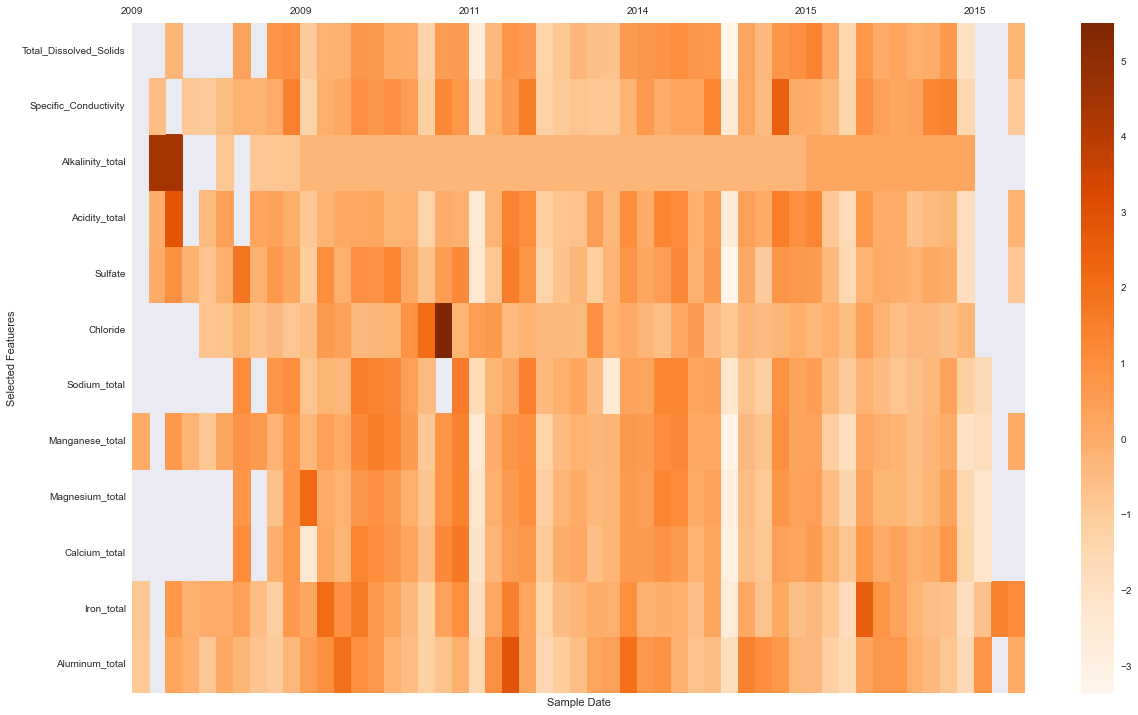

In [10]:
import numpy as np

#upload data set for analysis
all_data = pd.read_csv(filename, parse_dates=['Sample_Date'], index_col="Sample_Date", na_values=[""])
df1 = all_data.loc[all_data['Site_Grouping'] == 'AMD_Site']

#subset 12 features from uploaded data set
data_columns = ["Aluminum_total", 
                "Iron_total", 
                "Calcium_total", 
                "Magnesium_total", 
                "Manganese_total",
                "Sodium_total",
                "Chloride",
                "Sulfate",
                "Acidity_total",
                "Alkalinity_total",
                "Specific_Conductivity",
                "Total_Dissolved_Solids"] 

subset = df1[data_columns]

#standardization equation
norm_subset = ((subset - subset.mean()) / (subset.std())).transpose()

fig, ax = plt.subplots()
# create this masked array thing because NaNs are messing everything up
masked_array = np.ma.array (norm_subset, mask=np.isnan(norm_subset))
# create the heatmap
heatmap = ax.pcolor(masked_array, cmap="Oranges")
# set the size
fig.set_size_inches(20, 12)

# set the axis tick marks and other minor details
ax.set_yticks(np.arange(norm_subset.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(subset.index.year, minor=False)
ax.xaxis.tick_top()
ax.set_yticklabels(norm_subset.index, minor=False)
ax.set_xlim(0, norm_subset.shape[1])
plt.colorbar(heatmap)
plt.xlabel("Sample Date")
plt.ylabel("Selected Featueres")

## Plotly

Plotly standardizes the graphing interface across scientific computing languages (Python, R, MATLAB, etc) while giving rich interactivity and web shareability (<a href="https://plot.ly/python/user-guide/">Plotly User Guide</a>).
The <a href="https://plot.ly/python/">Plotly</a> Python library provides many examples of how data can be visualized and analyzed. In the example below we start of with a <a href="https://plot.ly/python/line-and-scatter/">basic scatter plot</a>. Follow the Users Guide to setup Plotly before using. 

In [19]:
#Did this the long-versioned way, so users would have an idea of how to make a basic scatter plot in plotly

## Important ## Plotly username and api key is needed to plot figures in jupyter. 
## For purposes of this tutorial figures have been embedded into the notebook using the html address. 
## py.sign_in('username', 'api key')

#To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py
#Graph objects to piece together plots
import plotly.graph_objs as go
#Useful Python/Plotly tools
import plotly.tools as tls

#create x and y data to be used in trace
subdownX = df[df['Site_Grouping'] == 'UIC_Downstream']
downX = subdownX['Site_Grouping']

subUpX = df[df['Site_Grouping'] == 'UIC_Upstream']
upX = subUpX['Site_Grouping']

subAMDX = df[df['Site_Grouping'] == 'AMD_Site']
amdX = subAMDX['Site_Grouping']

subRefX = df[df['Site_Grouping'] == 'Reference_Sites']
refX = subRefX['Site_Grouping']

subDowncl = df[df['Site_Grouping'] == 'UIC_Downstream']
downCly = subDowncl['Chloride']

subUpcl = df[df['Site_Grouping'] == 'UIC_Upstream']
upCly = subUpcl['Chloride']

subAMDcl = df[df['Site_Grouping'] == 'AMD_Site']
amdCly = subAMDcl['Chloride']

subRefcl = df[df['Site_Grouping'] == 'Reference_Sites']
refCly = subRefcl['Chloride']

subDownSul = df[df['Site_Grouping'] == 'UIC_Downstream']
downSul = subDownSul['Sulfate']

subUpSul = df[df['Site_Grouping'] == 'UIC_Upstream']
upSul = subUpSul['Sulfate']

subAMDSul = df[df['Site_Grouping'] == 'AMD_Site']
amdSul = subAMDSul['Sulfate']

subRefSul = df[df['Site_Grouping'] == 'Reference_Sites']
refSul = subRefSul['Sulfate']

#create a trace
trace0 = go.Scatter(
    x = downSul,
    y = downCly,
    mode = 'markers',
    name = 'Downstream')

trace1 = go.Scatter(
    x = upSul,
    y = upCly,
    mode = 'markers',
    name = 'Upstream')

trace2 = go.Scatter(
    x = amdSul,
    y = amdCly,
    mode = 'markers',
    name = 'AMD') 

trace3 = go.Scatter(
    x = refSul,
    y = refCly,
    mode = 'markers',
    name = 'Reference')

#Create a layout 
layout = go.Layout(
    title ='Chloride vs. Sulfate',
    hovermode='closest',
    xaxis=dict(
        title='Sulfate (mg/L)',
        ticklen=5,),
    yaxis=dict(
        title='Chloride (mg/L)',
        ticklen=5,),)

data = [trace0, trace1, trace2, trace3]
#Create figure object
fig = go.Figure(data=data, layout=layout)

#Open figure in plotly web hosting browser
#plot_url = py.plot(fig, filename='Choride-Sulfate')

#embed plotly url into jupyter notebook
tls.embed("https://plot.ly/~levidrose/39/chloride-vs-sulfate/")

A more advanced scatter plot, is the bubble chart. A bubble chart is similar to a scatterplot, but while scatterplots usually represent two variables — one on the x axis and one on the y — a bubble chart can represent a third variable by circle size (Plotly blog). Data can be viewed in four dimensions, the x-axis, the y-axis, marker size, and color. Here is a great tutorial on <a href="https://plot.ly/python/bubble-charts-tutorial/">bubble charts</a> that analyzes GapMinder data to replicate bubble charts inspired by Hans Rosling's work.

In [21]:
grouping = df['Site_Grouping']

#define a dictionary of colors, one for each site
colors = dict(
    UIC_Upstream='#1f77b4',
    UIC_Downstream='#ff7f0e',
    AMD_Site='#d62728',
    Reference_Sites='#2ca02c')

# Set 'size' values to be proportional to rendered area,
# instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'

#Set a reference for 'size' values (i.e. a Specific_Conductivity-to-pixel scaling).
sizeref = df['Specific_Conductivity'].max() / 1000

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, site, sizes, color):
    return go.Scatter(
        x=X['Sulfate'],  # Sulfate on the x-xaxis
        y=X['Chloride'], # Chloride on the y-axis
        name=site,       # label site names on hover
        mode='markers',  # point markers on this plot
        marker= go.Marker(
            color=color,   
            size=sizes,
            sizeref=sizeref,
            sizemode=sizemode,
            opacity=0.6,
            line= go.Line(width=0.0)))

# Initialize data object 
data = []

# Group data frame by site sub-dataframe (named X), 
#  make one trace object per site and append to data object
for site, X in df.groupby('Site_Grouping'):
    sizes = X['Specific_Conductivity']     #get Specfic Conductivity array
    color = colors[site]                   #get bubble color
    data.append(make_trace(X, site, sizes, color))

# Set plot and axis titles
title = 'Chloride vs. Sulfate as a function of Specific Conductivity'
x_title = "Sulfate (mg/L)"
y_title = "Chloride (mg/L)"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,
    gridcolor='#FFFFFF',
    ticks= 'outside',
    ticklen=8,
    tickwidth=1.5)

# Create layout object
layout = go.Layout(
    title=title,
    hovermode='closest',
    plot_bgcolor='#EFECEA',
    xaxis= go.XAxis(
        axis_style,
        title=x_title,),
    yaxis= go.YAxis(
        axis_style,
        title=y_title,))

# Create figure object
fig = go.Figure(data=data, layout=layout)

#Send to plotly and show in notebook
#py.iplot(fig, filename='Bubble_Chloride-vs-Sulfate')

#Open figure in plotly web hosting browser
#plot_url = py.plot(fig, filename='Bubble_Chloride-vs-Sulfate')

#embed plotly url into jupyter notebook
tls.embed("https://plot.ly/~levidrose/131/chloride-vs-sulfate-as-a-function-of-specific-conductivity/")  

In [23]:
data2 = []

def make_trace(X, site, sizes, color):
    return go.Scatter(
        x=X['Manganese_total'],
        y=X['Sodium_total'],
        name=site,
        mode='markers',
        marker= go.Marker(
            color=color,
            size=sizes,
            sizeref=sizeref,
            sizemode=sizemode,
            opacity=0.6,
            line= go.Line(width=0.0)))

for site, X in df.groupby('Site_Grouping'):
    sizes = X['Specific_Conductivity']
    color = colors[site]
    data2.append(make_trace(X, site, sizes, color))

title = 'Manganese vs. Sodium as a function of Specific Conductivity'
x_title = "Manganese (mg/L)"
y_title = "Sodium (mg/L)"

axis_style = dict(
    zeroline=False,
    gridcolor='#FFFFFF',
    ticks= 'outside',
    ticklen=8,
    tickwidth=1.5)

layout = go.Layout(
    title=title,
    hovermode='closest',
    plot_bgcolor='#EFECEA',
    xaxis= go.XAxis(
        axis_style,
        title=x_title,),
    yaxis= go.YAxis(
        axis_style,
        title=y_title,))

#Create figure object
fig = go.Figure(data=data2, layout=layout)

#Send to plotly and show in notebook
#py.iplot(fig, filename='Bubble_Acidity-vs-Alkalinity')

#Open figure in plotly web hosting browser
#plot_url = py.plot(fig, filename='Bubble_Acidity-vs-Alkalinity')

#embed plotly url into jupyter notebook
tls.embed("https://plot.ly/~levidrose/52/manganese-vs-sodium-as-a-function-of-specific-conductivity/")  

3D Scatter plots allow data to be viewed in at least five dimensions: the x-axis, y-axis, z-axis, marker size, and color. A basic 3D scatter plot tutorial can be found <a href="https://plot.ly/python/3d-scatter-plots/">here</a>.

In [24]:
grouping = df['Site_Grouping']

#define a dictionary of colors, one for each site
colors = dict(
    UIC_Upstream='#1f77b4',
    UIC_Downstream='#ff7f0e',
    AMD_Site='#d62728',
    Reference_Sites='#2ca02c')

sizemode = 'area'
sizeref = df['Specific_Conductivity'].max() / 2000

# Define a trace-generating function (returns a 3D Scatter object)
def make_trace(X, site, sizes, color):
    return go.Scatter3d(
        z=X['Sulfate'],
        x=X['Chloride'],
        y=X['Sodium_total'],
        name=site,
        mode='markers',
        marker= go.Marker(
            color=color,
            size=sizes,
            sizeref=sizeref,
            sizemode=sizemode,
            opacity=0.6,
            line= go.Line(width=0.0)))

data3 = []

# Group data frame by site sub-dataframe (named X), 
#  make one trace object per site and append to data object
for site, X in df.groupby('Site_Grouping'):
    sizes = X['Specific_Conductivity']
    color = colors[site]
    data3.append(make_trace(X, site, sizes, color))

# Set plot and axis titles    
title = 'Chloride vs. Sulfate vs. Sodium as a function of Specific Conductivity'
z_title = "Sulfate (mg/L)"
x_title = "Chloride (mg/L)"
y_title = "Sodium (mg/L)"

# Define a dictionary of axis style options
axis_style2 = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

#Create a layout object
layout = go.Layout(
    title=title,
    hovermode='closest',
    plot_bgcolor='#EFECEA',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,),
    scene=go.Scene(
        xaxis= go.XAxis(
            axis_style2,
            title=x_title,),
        yaxis= go.YAxis(
            axis_style2,
            title=y_title,),
        zaxis= go.ZAxis(
            axis_style2,
            title=z_title,)))

# Create figure object
fig = go.Figure(data=data3, layout=layout)

#Send to plotly and show in notebook
#py.iplot(fig, filename='3D_Chloride-Sulfate-Sodium')

#Open figure in plotly web hosting browser
#plot_url = py.plot(fig, filename='3D_Chloride-Sulfate-Sodium')

#embed plotly url into jupyter notebook
tls.embed("https://plot.ly/~levidrose/60/chloride-vs-sulfate-vs-sodium-as-a-function-of-specific-conductivity/")  

In [25]:
def make_trace(X, site, sizes, color):
    return go.Scatter3d(
        x=X['Iron_total'],
        y=X['Manganese_total'],
        z=X['Aluminum_total'],
        name=site,
        mode='markers',
        marker= go.Marker(
            color=color,
            size=sizes,
            sizeref=sizeref,
            sizemode=sizemode,
            opacity=0.6,
            line= go.Line(width=0.0)))

data4 = []

for site, X in df.groupby('Site_Grouping'):
    sizes = X['Specific_Conductivity']
    color = colors[site]
    data4.append(make_trace(X, site, sizes, color))

title = 'Chloride vs. Sulfate vs. Sodium as a function of Specific Conductivity'
x_title = "Iron (mg/L)"
y_title = "Manganese (mg/L)"
z_title = "Aluminum (mg/L)"

axis_style = dict(
    zeroline=False,
    gridcolor='#FFFFFF',
    ticks= 'outside',
    ticklen=8,
    tickwidth=1.5)

axis_style2 = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)


layout = go.Layout(
    title=title,
    hovermode='closest',
    plot_bgcolor='#EFECEA',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,),
    scene=go.Scene(
        xaxis= go.XAxis(
            axis_style2,
            title=x_title,),
        yaxis= go.YAxis(
            axis_style2,
            title=y_title,),
        zaxis= go.ZAxis(
            axis_style2,
            title=z_title,)))

#Create figure object
fig = go.Figure(data=data4, layout=layout)

#Send to plotly and show in notebook
#py.iplot(fig, filename='3D_Chloride-Sulfate-Sodium')

#Open figure in plotly web hosting browser
#plot_url = py.plot(fig, filename='3D_Chloride-Sulfate-Sodium')

#embed plotly url into jupyter notebook
tls.embed("https://plot.ly/~levidrose/138/aluminum-vs-iron-vs-manganese-as-a-function-of-specific-conductivity/")

## Principal Component Analysis

Principal Component Analysis (PCA) is a method of finding the principal components of the data. The principal components are the underlying structure of the data, directions or lines through the data that have the most variance.

PCA is useful for many types of data analysis. This guide is focused on the use of PCA for dimensionality reduction. Twelve features were chosen from the dataset, however there is no easy way to visualize all of these twelve features at once. PCA allows the twelve features to be projected to two or three principal components which can in turn be visualized with standard plots.

In python, PCA is usually performed with sklearn's implementation of the algorithm

In [ ]:
from sklearn.decomposition import PCA

There is an issue with using sklearn's PCA function on the supplied data; the function does not allow missing values. Many of the sklearn machine learning and data analysis functions do not allow for missing values, and as such, the missing values in the data set must be imputed or alternatives must be explored.

Data imputation is explored later in this notebook. This section will explore another method of filling in the missing values that will allow us to run PCA.

The first step is define a variable $X$ which will contain the original data (with missing values). Anoter variable will be defined to contain the groupings fore each row of features that X belongs to. Before exploring this alternative method of PCA, we first need to drop those rows from $X$ and *codings* that do not contain any values.

In [ ]:
X = all_data[subset.columns.values].as_matrix()
codings = all_data['Site_Grouping'].as_matrix()
mask = np.where(np.all(np.isnan(X), 1))

X = np.delete(X, mask, axis=0)
codings = np.delete(codings, mask, axis=0)

Currently, $X$ contains missing values. The goal of this section is to calculate a new variable, $X'$, which has all missing values filled in which we can then run the sklearn PCA function on. The method we will explore relies on the fact that $X$ can be decomposed into two matrices, $U$ and $V$ such that

$$U \cdot V^{T} = X$$

The general idea of this method is to solve for $U$ and $V$ in a way that ignored missing values and then using the above equation, solving for the new matrix $X'$. We estimate the best versions of $U$ and $V$ by using an iterative algorithm that exploits the following relationship which can easily be solved with python's built-in least squares function:

$$Ax = b$$

Before approaching the specifics of the algorithm we first need to declare our variables. $U$ and $V$ are initialized to zeroes and random values respectively. The size of $U$ is $MxK$ while the size of of $V$ is $NxK$. $M$ is the number of rows (samples) in the data, while $N$ is the number of features. $K$ is a value which we choose; the larger the value of $K$, the more (potentially) accurate our estimations, but the estimations will also be more computationally expensive. We are choosing a value of 50, which appears to produce reasonable results in a reasonable amount of time.

Since this is an iterative algorithm, there also needs to be variables to account for how many iterations to perform and when to converge. We also need another variable, $U'$, which will always contain the version of U one iteration previous; the sum of the difference between $U$ and $U'$ is used to test for convergence. 

In [ ]:
M = X.shape[0] # number of rows of X
N = X.shape[1] # number of features of X
K = 50 # how many 'components' we want to use. 
V = np.matrix(np.random.random((N, K))) # randomly initialized
U = np.matrix(np.zeros((M, K))) # initialized to all zeros

max_iterations = 3000 # max number of iterations if no convergence
Uprime = U.copy() # used to test for convergence
converge_at = 1e-10

Numpy's least squares function will solve the linear equation of the form $Ax = b$ for x, such that:

$$ x = f(A, b)$$

For the purposes of this algorthm, we can rewrite the relation $Ax = b$ and subsequent solution for $U$ and $V$ as follows

$$ UV^{T}= X  \rightarrow V^{T}= f(U, X)$$

$$ VU^{T}= X^T \rightarrow U^{T}= f(V, X^T)$$

This algorithm will estimate $U$ and $V$ by iteratively solving the above equations until convergence. Each iteration of the algortihm will ignore rows and columns of $X$ with missing values so that $U$ and $V$ will contain no missing values.

In [ ]:
# loop until either convergence or until max iterations is reached
for i in range(max_iterations):
    # estimate U
    for i in range(M):
        Xit = X[i, :].transpose()
        validIndecies = ~np.isnan(Xit)
        U[i, :] = np.matrix(np.linalg.lstsq(V[validIndecies, :], Xit[validIndecies])[0])

    # estimate V
    for j in range(N):
        Xjt = X[:, j]
        validIndecies = ~np.isnan(Xjt)
        V[j, :] = np.matrix(np.linalg.lstsq(U[validIndecies], Xjt[validIndecies])[0])
    
    # test for convergence
    difference = np.sum(np.abs(Uprime - U))
    if difference < converge_at:
        print("Converged at iteration: %d" % i)
        break

    Uprime = U.copy()

Now that the values of $U$ and $V$ have been estimated and contain no missing values, the matrix $X'$ can be solved by taking the dot product $U \cdot V^{T}$. 

In [ ]:
Xprime = np.dot(U, V.transpose())

Now that $X'$ has been estimated and contains no missing values, it is possible to use Python's PCA function to find the principal compoents of the data and plot the results. 

In [ ]:
# now that we have a version of X with no missing values, we can run PCA
pca = PCA(n_components=2)
x_2components = pca.fit_transform(Xprime)

print("attempting to plot")
labels = ['UIC_Downstream', 'UIC_Upstream', 'AMD_Site', 'Reference_Sites']
color_index = 0
colors = ["red", "blue", "green", "purple"]
for label in labels:
    indexes = np.where(codings == label)
    plt.scatter(x_2components[indexes, 0], x_2components[indexes, 1], c=colors[color_index], label=label)
    color_index += 1
    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

While the results show us little about the actual values of the data, it does demonstrate the similariteis (or lack therof) between the different groupings. It is easy to determine that the 'AMD_Site' has values for its features that are consistently different than that of the other sites.

## Imputation

Many data analysis and machine learning algorithms (especially within the sklearn package of python) do not allow missing values within the data. Thus steps must be taken to produce data without missing values. One method of eliminating missing values is to simply drop all rows or columns that contain a missing value. While simple, this method canot be utilized for the data set because doing so would leave very few rows of data left. Instead of dropping rows or ignoring data, we need to find a method of filling in missing values in a way that does not significantly skew the results of data analysis. 

Data imputation is the process of filling in missing values within data. The simplest method of imputation include filling in all missing values with a 0 or a 1, or filling them in with the mean or mode of the data. Each of these methods has drawbacks and will add some amount of error to the data. 

The goal of this section is to explore a method of data imputation which is both simple, and reasonably effective at reducing the skewness of the final imputated data. This will be acomplished by randomly generating reasonable values for each missing value of the data based upon parameters of the data that is present. 

Most of the values of each feature and site grouping of the dataset follow something similar to a normal distribution. If given a missing value, we can use the data that is present to find the mean and standard deviation of that feature for that site grouping, and using these parameters sample from a normal distribution a replacement value. By doing so, appropriate values will be generated for each missing value that will minimally skew the mean or standard deviation.

There is a problem with using the normal distribution.  By definition a normal distribution has a nonzero probability of generating negative values. In addition, many of the features do not precisely follow a normal distribution shape, they tend to have a bell curve towards the lower values and some larger outlier values. To resolve this, we can use a lognormal distribution instead of a normal distribution. A lognormal distribution can only produce non-negative values and has a slight right skew. 

A feature from the dataset, and a sampling from a normal and lognormal distribution are plotted below. Notice how the lognormal distribution more closely models the feature than the normal distribution; this relationship is not true for every feature, but the model will still generate reasonable values for those features with a slightly different shape.

In [ ]:
chloride_amd = (all_data.loc[all_data['Site_Grouping'] == "AMD_Site"])["Chloride"]
bins = len(chloride_amd)
chloride_amd.plot(kind="hist", bins=bins, title="Actual Distribution")
mu = np.log(chloride_amd).mean()
sigma = np.log(chloride_amd).std()

plt.figure()
samplings = np.random.normal(mu, sigma, 1000)
plt.hist(samplings, bins=bins, range=(0, 20))
plt.title("Generated Normal Distribution")
plt.ylabel("Frequency")


plt.figure()
samplings = np.random.lognormal(mu, sigma, 1000)
plt.hist(samplings, bins=bins, range=(0, 20))
plt.title("Generated Lognormal Distribution")
plt.ylabel("Frequency")

The lognormal distribution can be used to replace all missing values within the dataset. In order for the lognormal distribution to produce the intended value, it is important to take the log of the data before calculating the mean and standard deviation.

By using only data that is present for each feature/grouping combination, values are generated that are consistent with other values within their site_grouping.

In [ ]:
# Imputes missing value in subset with random drawings from normal distribution
imputed_subset = all_data[data_columns].copy()

for feature in data_columns:
    column = all_data[feature]
    for i in range(len(column)):
        if np.isnan(column[i]):
            this_grouping = (all_data.iloc[i])['Site_Grouping']
            group = np.log((all_data.loc[all_data['Site_Grouping'] == this_grouping])[feature])
            mu, sigma = group.mean(), group.std()
            # if not enough data, produce a very small, nonzero value for sigma
            if np.isnan(sigma):
                sigma = 1e-13
            imputed_subset[feature][i] = np.random.lognormal(mu, sigma)

With an imputated dataset, all of sklearn's machine learning and analysis becomes available. Below is an example of using PCA with the imputed dataset. While it is not exactly like the previously calculated principal components, it is similar and shows a similar relationship between the AMD_site and the other sites.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_2components = pca.fit_transform(imputed_subset[data_columns])

labels = ['UIC_Downstream', 'UIC_Upstream', 'AMD_Site', 'Reference_Sites']
color_index = 0
colors = ["red", "blue", "green", "purple"]
for label in labels:
    indexes = np.array(all_data["Site_Grouping"] == label)
    plt.scatter(x_2components[indexes, 0], x_2components[indexes, 1], c=colors[color_index], label=label)
    color_index += 1
    
plt.legend()
fig = plt.gcf()

fig.set_size_inches(18.5, 10.5)
plt.title("PCA of River Quality Stuff")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## Feature Scaling 

Each of the selected features contain values which have different types of measurement, and different ranges of "normal". Variables like 'Specific Conductivity' are considered normal with values well above 1000, while variables like 'Calcium' are expected to be measured different, and has a normal range well below that of 'Specific Conductivity'. The difference in scale between features is a problem becuase during statistical analysis and visualization features with a larger average value will overpower features with a smaller average.

The effect of this can be seen below, where much of the graph is dominated by a few of those features that have large averages. It is difficult if not impossible to discern the role of the features with smaller averages. 

In [ ]:
subset.plot(figsize=(15, 10))

This section of analysis focuses on the variance of each feature over time. To properly analyze the data each of the features will need to be scaled to occupy a similar range of data. There are two methods of scaling data to a similar range, *normalization* and *standardization*

Normalization will scale all values to be within the range of 0 to 1 and is defined as follows:

$$X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Standardization will scale the values to have zero mean and unit variance. Standardization will scale all values to a similar range where values greater than the mean will be positive, while values less than the mean will be negative however there is upper or lower limit on the values. The equation to calculate standardization is defined as follows:

$$X_{norm} = \frac{X - \mu}{\sigma}$$

Both techniques have drawbacks, however normalization contains more drawbacks for this analysis than does standardization. By limiting the values to such a small range, normalization will supress the prominence of outliers or those values near the max or min of each feature. Basically normalization would make outliers appear more *normal*. Standardization is preferred because the results are unbounded and so the relative range of values will be maintained. 

There are methods of scaling the data using the Sklearn proprocessing package however those functions do not work on data that contains missing values. Imputation is explored later in this notebook and for now, we would prefer not to have to worry about imputed values skewing the scaling. Thus, we will perform the calculation manually by using the standardization equation.

In [ ]:
norm_subset = ((subset - subset.mean()) / (subset.std())).transpose()

Now the plot from earlier can be repreated with the standardized data and it now becomes possible for a human to notice and understand the varying values of the data. 

In [ ]:
norm_subset.transpose().plot(figsize=(12, 10))

## Feature Selection

Another useful method of data analysis (and machine learning) is the use of feature selection. Feature selection techniques seek to select those features that explain most of the 'variance' between each classification. In the case of the water quality data, feature selection would select those features which vary most between each site grouping. A feature that greatly varies between each site grouping may be a useful parameter to identify geochemical signatures.

Below the data set is applied to sklearn's SelectKBest function to determine the best features. The SelectKBest function requires the function to determine the best feature to be passed as a parameter; for this data we are using the f_classif function.

f_classif uses sklearn's version of ANOVA (Analysis of Variance) to detemrine the bset features. From a high level perspective, ANOVA calculates the amount of variation that occurs between each feature/site grouping combination and gives a higher score to those features that vary the most.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

codings = all_data["Site_Grouping"]

selector1 = SelectKBest(f_classif, k=5).fit(imputed_subset, codings)
scores1 = selector1.scores_[selector1.get_support()]
columns1 = subset.columns.values[selector1.get_support()]
df_fclassif = pd.DataFrame(scores1, columns1).sort([0], ascending=False)
df_fclassif

It appears that the total amount of manganese used for this analysis varies greatly between site groupings. If creating a predictive model or applying some other machine learning technique to the data set, it would make sense to prioritize these selected features as they explain most of the variation between classifications.

It is also important to note that these features were selected using the previously imputed data and thus results should be scrutinized as they will likely have some amount of error. More samples for each site would minimize the potential error.

## New Data Set Generation

We played around with a couple of different ways to generate new data sets from the existing data, so that the framework for statistical analysis could be approached. The example below generates different sized data sets based off the mean and standard deviation of the selected chemical constituent based on a normal distribution for the upstream site.

In [ ]:
import numpy as np

UIC_Upstream = df[df['Site_Grouping'] == 'UIC_Upstream']
upstream_cl = UIC_Upstream[["Chloride"]]

def sampleReplacement(someArray, howmany):
    resultArray = []
    for i in range(howmany):
        resultArray.append(np.random.normal(someArray.mean(), someArray.std()))
    return np.array(resultArray)

UIC_Upstream_Cl = {}
for i in range(0, 51, 10):
    UIC_Upstream_Cl[i] = sampleReplacement(upstream_cl, i)

up50 = UIC_Upstream_Cl[50]
UIC_Upstream_Cl


The example below generates different sized data sets based off the mean and standard deviation of the selected chemical constituent based on a normal distribution for the downstream site.

In [ ]:
UIC_Downstream = df[df['Site_Grouping'] == 'UIC_Downstream']
downstream_cl = UIC_Downstream["Chloride"]

UIC_Downstream_Cl = {}
for i in range(0, 51, 10):
    UIC_Downstream_Cl[i] = sampleReplacement(downstream_cl, i)
    
UIC_Downstream_Cl

The absolute value funtion was applied to the dataset to remove negative numbers from the distribution.

In [ ]:
down50 = UIC_Downstream_Cl[50]

abs_down50 = np.absolute(down50)
abs_down50

An alternative method to generate a new dataset. The uniform distribution function is applied, and the min and max values of Chloride for the downstream site are used to confine the dataset. 

In [ ]:
down = np.random.uniform(4.8,301,50)
down

The uniform distribution function is applied, and the min and max values of Chloride for the upstream site are used to confine the dataset. 

In [ ]:
up = np.random.uniform(0.6,0.65,50)
up

Histograms are produced to analyze the distribution of the different methods applied to create new datasets. 

In [ ]:
plt.hist(down50, 20)
plt.hist(abs_down50, 20)
plt.hist(down, 20)

Histograms are produced to analyze the distribution of the different methods applied to create new datasets. 

In [ ]:
plt.hist(up50, 20)
plt.hist(up, 20)

The <a href="http://docs.scipy.org/doc/scipy/reference/stats.html">scipy</a> library package is installed to utilize the <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon">wilcoxon</a> statistical function. 

In [ ]:
from scipy import stats

stats.wilcoxon(up, down, 'wilcox' )

<p><b><font size="3">References</font></b></p> 

Chambers, John, William Cleveland, Beat Kleiner, and Paul Tukey. (1983). "Graphical Methods for Data Analysis", Wadsworth.

Jupyter Documentation. http://jupyter.readthedocs.org/en/latest/index.html (last accessed 12/3/15)

Jupyter Notebook User's Manual. http://jupyter.cs.brynmawr.edu/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb (last accessed 12/3/15)

Mark Bakker. "Exploratory computing with Python" https://mbakker7.github.io/exploratory_computing_with_python/ (last accessed 12/3/15)

NIST/SEMATECH e-Handbook of Statistical Methods. http://www.itl.nist.gov/div898/handbook/eda/eda.htm (last accessed 12/3/15)

Plotly Blog. "The Power of Bubble Charts." http://blog.plot.ly/post/71637573256/the-power-of-bubble-charts (last accessed 12/6/15)

Plotly User Guide. https://plot.ly/python/user-guide/. (last accessed 12/6/15)

U.S. Environmental Protection Agency. "Exploratory Data Analysis." http://www3.epa.gov/caddis/da_exploratory_0.html (last    accessed 12/3/15)

Waltenburg, Eric, and William McLauchlan. (2012). "Exploratory Data Analysis: A Primer for Undergraduates." 